In [216]:
import numpy as np
import math
from skimage.transform import resize
import scipy.ndimage
import matplotlib.pyplot as plt

# Downsample using order 8 Chebyshev type I filter
def downsample(data):
    return scipy.signal.decimate(data, 6, axis = 0)

def prepare_data(mat):
    # Left footstep
    dataL = mat['dataL']
    # Right footstep
    dataR = mat['dataR']  
    return (dataL, dataR)

def calGRF(data):
    return np.add.accumulate(data)

def process_foot(data):
    Tmax = 1600
    data = data[:Tmax]
    data = downsample(data)
    grf = calGRF(data)
    s_avg = data.mean(axis=1)
    s_upper = np.amax(data,axis=1)
    s_lower = np.amin(data,axis=1)
    grf_t = grf.mean(axis=1)
    grf_t_max = np.max(grf_t)
    grf_t /= grf_t_max
    processed = np.stack((s_avg,grf_t,s_upper,s_lower))
    return processed 

def process_matlab(mat):
    dataL, dataR = prepare_data(mat)
    footL, footR = process_foot(dataL), process_foot(dataR)
    plt.plot(footL[3])
    processed = np.append(footL,footR,axis = 1)
    return processed


In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import scipy.io
import scipy.signal

In [218]:
index_files_path = 'SFootBD/IndexFiles/'
data_files_path = 'SFootBD/SFootBD/'

train_list_file = index_files_path + 'LstTrain'
imposter_list_file = index_files_path + 'LstImp'
test_evaluation_list_file = index_files_path + 'LstTestEvaluation'
test_validation_list_file = index_files_path + 'LstTestValidation'

In [219]:
train_list = pd.read_csv(train_list_file, sep = ' ', header = None)

train_list.head()

,0,1
0,15,2007-05-22_16-35-52_693
1,15,2007-05-22_16-24-39_584
2,15,2007-05-22_16-35-41_215
3,15,2007-05-22_16-24-29_028
4,15,2007-05-22_16-24-50_450


In [220]:
mat_file = os.path.join(data_files_path, train_list[1][12] + '.mat')

mat = scipy.io.loadmat(mat_file)

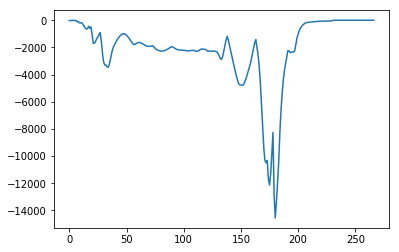

In [221]:
spatio_temporal = process_matlab(mat)

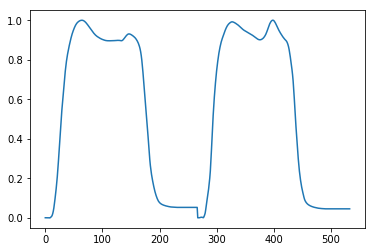

In [225]:
plt.plot(spatio_temporal[0]);